# Регрессия IC50

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Загрузка данных и разделение на выборки

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
target = 'SI'

In [89]:
df = pd.read_parquet("data/processed_data_full.parquet")

In [90]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,6.239374,175.482382,28.125000
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,0.771831,5.402819,7.000000
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,223.808778,161.142320,0.720000
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,3.075405,-0.085436,1.705624,107.855654,63.235294
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,139.270991,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.000104,34.999650,1.129017
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.999934,33.999415,1.062484
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,30.999883,33.999458,1.096761
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.998959,32.999644,1.031272


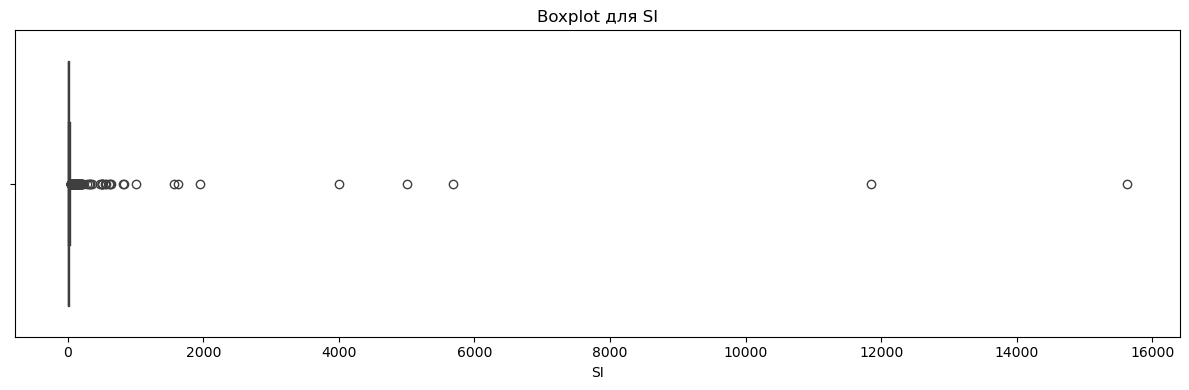

In [91]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df[target])

plt.title(f'Boxplot для {target}')
plt.tight_layout()
plt.show()

In [92]:
df["log_10_SI"] = np.log10(df[target])

In [93]:
target_old = target
target = "log_10_SI"

In [94]:
target = target_old
target_old = "log_10_SI"

In [95]:
mean = df[target].mean()
std = df[target].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]

print("Выбросы по правилу 3 сигм:")
outliers

Выбросы по правилу 3 сигм:


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,log_10_SI
102,0.339166,-0.801008,0.583045,-0.034586,0.672790,-0.764201,0.970667,-0.645394,0.560849,-0.464267,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,0.393088,1965.439708,5000.000000,3.698970
748,0.119444,-0.938375,-0.017240,0.427914,-0.252222,-0.529055,0.730559,-0.913366,1.479895,-0.467427,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,0.003517,19.999437,5687.000000,3.754883
750,0.119444,-0.938375,-0.017240,0.427914,-0.252222,-0.529055,0.730559,-0.913366,1.479895,-0.467427,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,0.021100,250.001758,11848.333333,4.073657
772,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,0.032009,128.090060,4001.700000,3.602245
775,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,0.016004,249.999200,15620.600000,4.193698


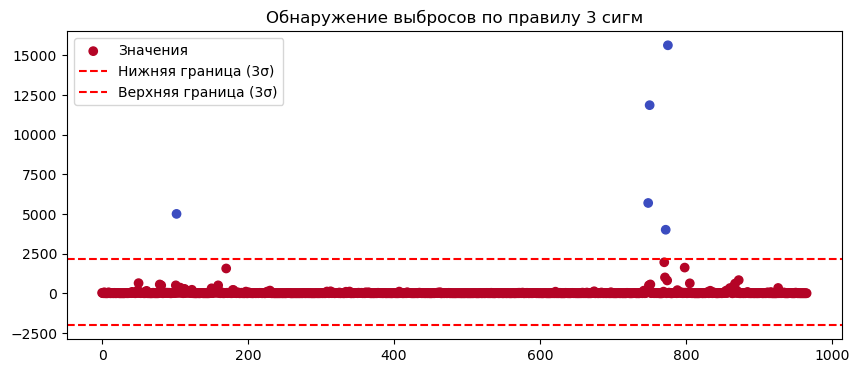

In [96]:
df['is_outlier_3σ'] = (df[target] < lower_bound) | (df[target] > upper_bound)

plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_3σ'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (3σ)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (3σ)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

In [97]:
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["is_outlier_IQR"] = (df[target] < lower_bound) | (df[target] > upper_bound)
df[(df[target] < lower_bound) | (df[target] > upper_bound)]

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,log_10_SI,is_outlier_3σ,is_outlier_IQR
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.238522,-0.27518,3.075405,-0.085436,1.705624,107.855654,63.235294,1.800960,False,True
9,-1.446717,0.351971,0.763797,-0.650039,0.554459,0.917583,-0.865343,-0.642440,-2.242239,-0.468731,...,-0.238522,-0.27518,-0.169643,-0.085436,6.400847,400.906360,62.633333,1.796806,False,True
41,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.238522,-0.27518,2.264143,-0.085436,15.078486,1344.065056,89.137931,1.950063,False,True
44,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.238522,-0.27518,3.075405,-0.085436,22.825266,1254.135512,54.945055,1.739929,False,True
47,-1.758664,1.295320,0.865404,-1.586508,0.639545,0.918595,-1.556297,1.522921,-2.534171,-0.581647,...,-0.238522,-0.27518,7.131714,-0.085436,45.006900,2216.216562,49.241706,1.692333,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0.598544,0.781167,-0.436645,0.552863,-0.589995,-0.561052,0.857677,-0.425583,-0.587957,-0.451673,...,-0.238522,-0.27518,-0.169643,-0.085436,11.399193,499.994648,43.862285,1.642091,False,True
916,0.644852,0.736788,-0.442487,0.571027,-0.622508,-0.450966,0.857752,-0.421804,-0.775944,-0.451660,...,-0.238522,-0.27518,-0.169643,-0.085436,6.299480,500.000000,79.371629,1.899665,False,True
926,-1.639888,1.300933,0.866009,1.533078,0.529893,-0.292842,-0.477621,0.709040,0.163989,0.596023,...,-0.238522,3.63399,-0.169643,-0.085436,0.298932,99.999046,334.521277,2.524424,False,True
934,1.159558,-0.595294,-0.286326,-1.475986,-1.138048,2.425224,1.332984,-0.795052,-1.104921,-0.287681,...,-0.238522,-0.27518,-0.169643,-0.085436,1.900747,99.999546,52.610669,1.721074,False,True


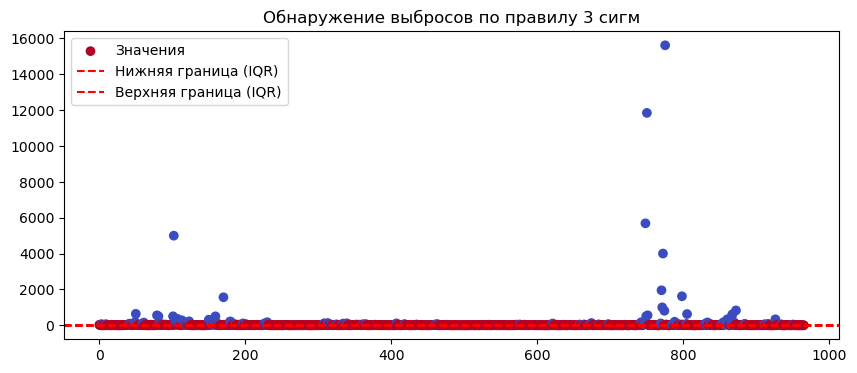

In [98]:
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_IQR'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (IQR)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (IQR)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

Отбросим выбросов по 3-м сигмам значительно меньше, чем по правилу Тьюки. 

Данные распределены близко к нормальному распределнию, следовательно отбросим выбросы по 3 sigma

In [99]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,log_10_SI,is_outlier_3σ,is_outlier_IQR
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.238522,-0.27518,2.264143,-0.085436,6.239374,175.482382,28.125000,1.449093,False,False
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.238522,-0.27518,2.264143,-0.085436,0.771831,5.402819,7.000000,0.845098,False,False
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.238522,-0.27518,2.264143,-0.085436,223.808778,161.142320,0.720000,-0.142668,False,False
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.238522,-0.27518,3.075405,-0.085436,1.705624,107.855654,63.235294,1.800960,False,True
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,139.270991,1.300000,0.113943,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.238522,-0.27518,-0.169643,-0.085436,31.000104,34.999650,1.129017,0.052701,False,False
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.238522,-0.27518,-0.169643,-0.085436,31.999934,33.999415,1.062484,0.026322,False,False
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.238522,-0.27518,-0.169643,-0.085436,30.999883,33.999458,1.096761,0.040112,False,False
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.238522,-0.27518,-0.169643,-0.085436,31.998959,32.999644,1.031272,0.013373,False,False


In [100]:
data_cleaned_IQR = df[~df['is_outlier_IQR']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ'])
# data_cleaned_IQR = df[~df['is_outlier_3σ']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ', target_old])

data_cleaned_IQR

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,log_10_SI
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,6.239374,175.482382,28.125000,1.449093
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,0.771831,5.402819,7.000000,0.845098
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,223.808778,161.142320,0.720000,-0.142668
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,139.270991,1.300000,0.113943
5,-1.561554,0.581897,0.788562,0.622322,-0.065454,-0.151286,-1.367945,0.132641,-0.753386,-0.581627,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,15.037911,30.075821,2.000000,0.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.000104,34.999650,1.129017,0.052701
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.999934,33.999415,1.062484,0.026322
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,30.999883,33.999458,1.096761,0.040112
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.998959,32.999644,1.031272,0.013373


In [101]:
X = data_cleaned_IQR[data_cleaned_IQR.columns[:-3]]
y_ic50 = data_cleaned_IQR[target]

<Axes: xlabel='SI', ylabel='Count'>

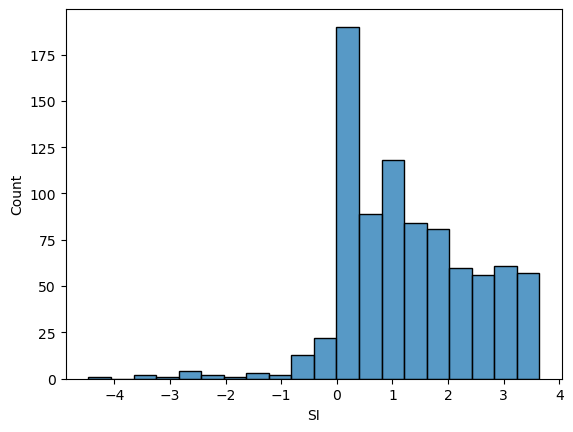

In [102]:
sns.histplot(data=np.log(y_ic50))

In [103]:
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM"
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,6.239374
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,0.771831
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,223.808778
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,107.131532
5,-1.561554,0.581897,0.788562,0.622322,-0.065454,-0.151286,-1.367945,0.132641,-0.753386,-0.581627,...,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,15.037911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.000104
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.999934
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,3.613328,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,30.999883
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.998959


In [104]:
y_ic50

0      28.125000
1       7.000000
2       0.720000
4       1.300000
5       2.000000
         ...    
961     1.129017
962     1.062484
963     1.096761
964     1.031272
965     1.000000
Name: SI, Length: 847, dtype: float64

In [105]:
y_ic50 = y_ic50 * 10

In [106]:
X_train, X_test, y_train_ic50, y_test_ic50 = train_test_split(
    X, y_ic50, test_size=0.15, random_state=42
)

## Инициализация моделей и метрик

In [107]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

In [108]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [109]:
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=RANDOM_STATE),
    'XGBoost': XGBRegressor(random_state=RANDOM_STATE),
    'SVR': SVR()
}

metrics = {
    'R2': r2_score,
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error,
    'MAPE': mean_absolute_percentage_error
}

## Бейзлайн

Проверим линейные модели, деревья, а также SVR

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
results = []

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train_ic50, 
                               cv=5, scoring='r2', n_jobs=-1)
    
    model.fit(X_train, y_train_ic50)
    y_pred = model.predict(X_test)
    
    model_metrics = {metric_name: metric_func(y_test_ic50, y_pred) 
                     for metric_name, metric_func in metrics.items()}
    
    results.append({
        'model': name,
        'cv_mean_r2': np.mean(cv_scores),
        'cv_std_r2': np.std(cv_scores),
        **model_metrics
    })

results_df = pd.DataFrame(results)
print(results_df)

          model  cv_mean_r2  cv_std_r2        R2        RMSE        MAE  \
0         Ridge   -0.086966   0.137880  0.228403   89.794231  64.572138   
1         Lasso    0.127103   0.083317  0.270788   87.293129  60.282802   
2  RandomForest    0.204572   0.108726  0.380450   80.462094  49.670423   
3       XGBoost    0.051447   0.135166  0.272932   87.164673  52.859318   
4           SVR   -0.024932   0.065603 -0.069738  105.728424  59.488465   

       MAPE  
0  2.053788  
1  1.876895  
2  1.411732  
3  1.365244  
4  1.005160  


Как видно, деревья и SVR дают лучшие результаты.

Попробуем оптимизировать их с помощью подбора гиперпараметров

## Оптимизация

Будем оптимизировать при помощи Optuna

In [112]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [113]:
N_TRIALS_RF = 100
CV_FOLDS_RF = 10

N_TRIALS_XGB = 100
CV_FOLDS_XGB = 10

N_TRIALS_SVR = 30
CV_FOLDS_SVR = 5

### Random Forest

In [114]:
def optimize_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    model = RandomForestRegressor(
        **params,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    
    r2_scores = cross_val_score(
        model, X_train, y_train_ic50, 
        cv=CV_FOLDS_RF, scoring='r2', n_jobs=-1
    )
    
    return np.mean(r2_scores)

In [115]:
study_rf = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=RANDOM_STATE)
)
study_rf.optimize(optimize_rf, n_trials=N_TRIALS_RF)

[I 2025-06-04 01:45:42,276] A new study created in memory with name: no-name-00f062ca-d0f8-414a-b2ef-470c6a418a19


[I 2025-06-04 01:45:43,533] Trial 0 finished with value: 0.17064743810695854 and parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.17064743810695854.
[I 2025-06-04 01:45:44,938] Trial 1 finished with value: 0.17368249856514234 and parameters: {'n_estimators': 641, 'max_depth': 37, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.17368249856514234.
[I 2025-06-04 01:45:46,008] Trial 2 finished with value: 0.16063124926328598 and parameters: {'n_estimators': 374, 'max_depth': 29, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.17368249856514234.
[I 2025-06-04 01:45:47,078] Trial 3 finished with value: 0.1644525259671386 and parameters: {'n_estimators': 510, 'max_depth': 41, 'min_samples_split': 5, 'min_samples_leaf': 6, 

In [116]:
print(f"Лучшие параметры для Random Forest:")
print(study_rf.best_params)
print(f"Лучший R2: {study_rf.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_rf)
fig.show()

fig = optuna.visualization.plot_param_importances(study_rf)
fig.show()

Лучшие параметры для Random Forest:
{'n_estimators': 103, 'max_depth': 49, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}
Лучший R2: 0.1934


In [117]:
best_rf_model = RandomForestRegressor(
    **study_rf.best_params,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
best_rf_model.fit(X_train, y_train_ic50)

RandomForestRegressor(bootstrap=False, max_depth=49, max_features='sqrt',
                      min_samples_leaf=10, min_samples_split=3,
                      n_estimators=103, n_jobs=-1, random_state=42)

#### Оценка модели на лучшем наборе данных

In [118]:
y_pred_best_rf = best_rf_model.predict(X_test)

final_metrics_rf = {metric_name: metric_func(y_test_ic50, y_pred_best_rf) 
                 for metric_name, metric_func in metrics.items()}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
R2: 0.2788
RMSE: 86.8131
MAE: 58.2149
MAPE: 2.5048


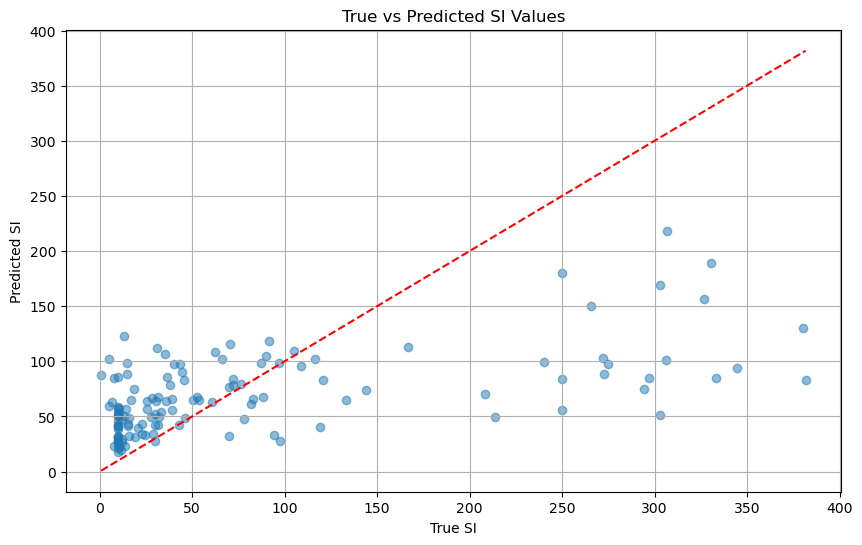

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ic50, y_pred_best_rf, alpha=0.5)
plt.plot([min(y_test_ic50), max(y_test_ic50)], 
         [min(y_test_ic50), max(y_test_ic50)], 'r--')
plt.xlabel('True SI')
plt.ylabel('Predicted SI')
plt.title('True vs Predicted SI Values')
plt.grid(True)
plt.show()

#### Анализ важности признаков

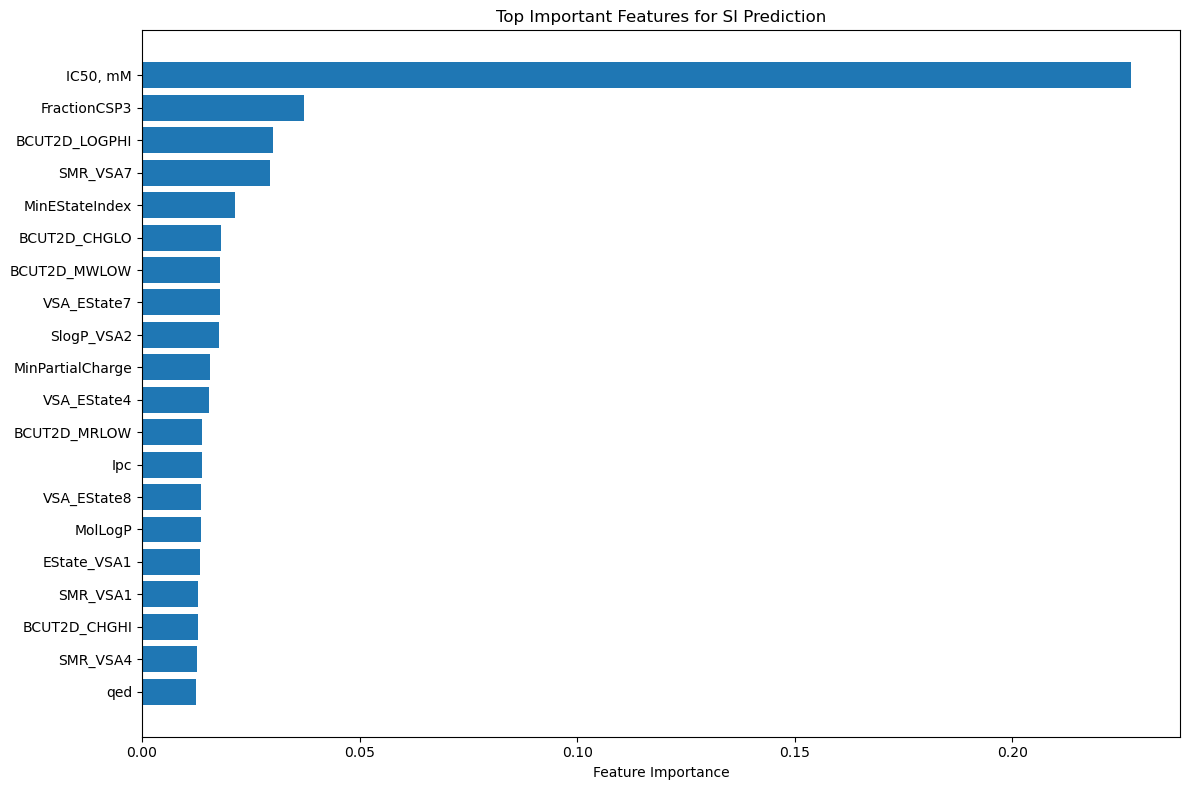

In [120]:
if hasattr(best_rf_model, 'feature_importances_'):
    importances = best_rf_model.feature_importances_
    feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
    
    sorted_idx = importances.argsort()[::-1]
    top_features = 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features for SI Prediction')
    plt.tight_layout()
    plt.show()

### XGBoost

In [121]:
def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }
    
    model = XGBRegressor(
        **params,
        random_state=RANDOM_STATE,
        tree_method='exact',
        enable_categorical=False
    )
    
    r2_scores = cross_val_score(
        model, X_train, y_train_ic50, 
        cv=CV_FOLDS_XGB, scoring='r2', n_jobs=-1
    )
    
    return np.mean(r2_scores)


In [122]:
study_xgb = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=RANDOM_STATE)
)
study_xgb.optimize(optimize_xgb, n_trials=N_TRIALS_XGB)

[I 2025-06-04 01:47:29,021] A new study created in memory with name: no-name-f4ef12d1-bcba-41e2-91d5-1ebecc608a3b
[I 2025-06-04 01:47:32,751] Trial 0 finished with value: 0.16688579169485548 and parameters: {'n_estimators': 437, 'max_depth': 12, 'learning_rate': 0.06504856968981275, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'gamma': 0.7799726016810132, 'reg_alpha': 0.5808361216819946, 'reg_lambda': 8.661761457749352}. Best is trial 0 with value: 0.16688579169485548.
[I 2025-06-04 01:47:39,423] Trial 1 finished with value: 0.20135319819385328 and parameters: {'n_estimators': 641, 'max_depth': 10, 'learning_rate': 0.001124579825911934, 'subsample': 0.9849549260809971, 'colsample_bytree': 0.9162213204002109, 'gamma': 1.0616955533913808, 'reg_alpha': 1.8182496720710062, 'reg_lambda': 1.8340450985343382}. Best is trial 1 with value: 0.20135319819385328.
[I 2025-06-04 01:47:42,218] Trial 2 finished with value: 0.2493219519363999 and parameters: {'n_estimators':

In [123]:
print(f"Лучшие параметры для XGBoost:")
print(study_xgb.best_params)
print(f"Лучший R2: {study_xgb.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_xgb)
fig.show()

fig = optuna.visualization.plot_param_importances(study_xgb)
fig.show()

Лучшие параметры для XGBoost:
{'n_estimators': 970, 'max_depth': 7, 'learning_rate': 0.0026925219389744835, 'subsample': 0.7912795603754817, 'colsample_bytree': 0.9209305484417195, 'gamma': 4.283062266860302, 'reg_alpha': 9.057718274976278, 'reg_lambda': 8.596230556767097}
Лучший R2: 0.2866


In [124]:
best_xgb_model = XGBRegressor(
    **study_xgb.best_params,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
best_xgb_model.fit(X_train, y_train_ic50)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9209305484417195, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=4.283062266860302, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0026925219389744835,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=970, n_jobs=-1,
             num_parallel_tree=None, ...)

#### Оценка модели на лучшем наборе данных

In [125]:
y_pred_best_xgb = best_xgb_model.predict(X_test)

final_metrics_xgb = {metric_name: metric_func(y_test_ic50, y_pred_best_xgb) 
                 for metric_name, metric_func in metrics.items()}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_xgb.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
R2: 0.3702
RMSE: 81.1254
MAE: 50.3477
MAPE: 1.5746


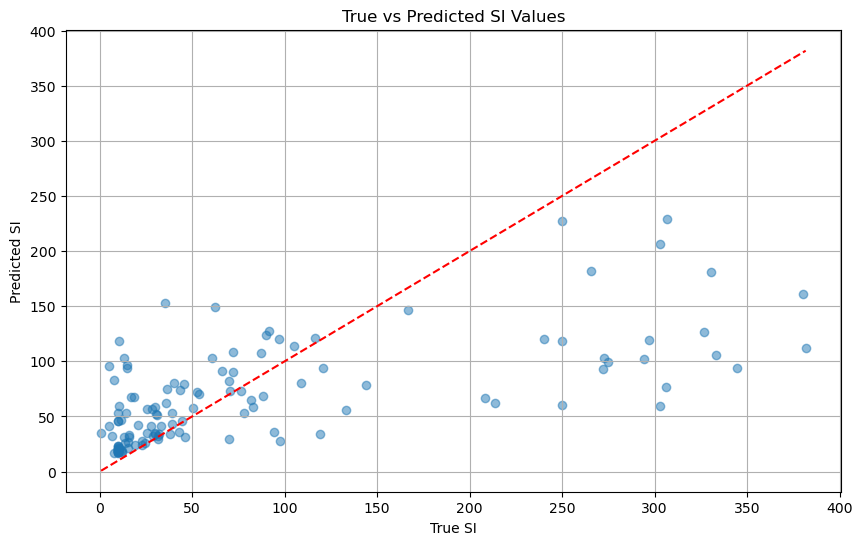

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ic50, y_pred_best_xgb, alpha=0.5)
plt.plot([min(y_test_ic50), max(y_test_ic50)], 
         [min(y_test_ic50), max(y_test_ic50)], 'r--')
plt.xlabel('True SI')
plt.ylabel('Predicted SI')
plt.title('True vs Predicted SI Values')
plt.grid(True)
plt.show()

#### Анализ важности признаков

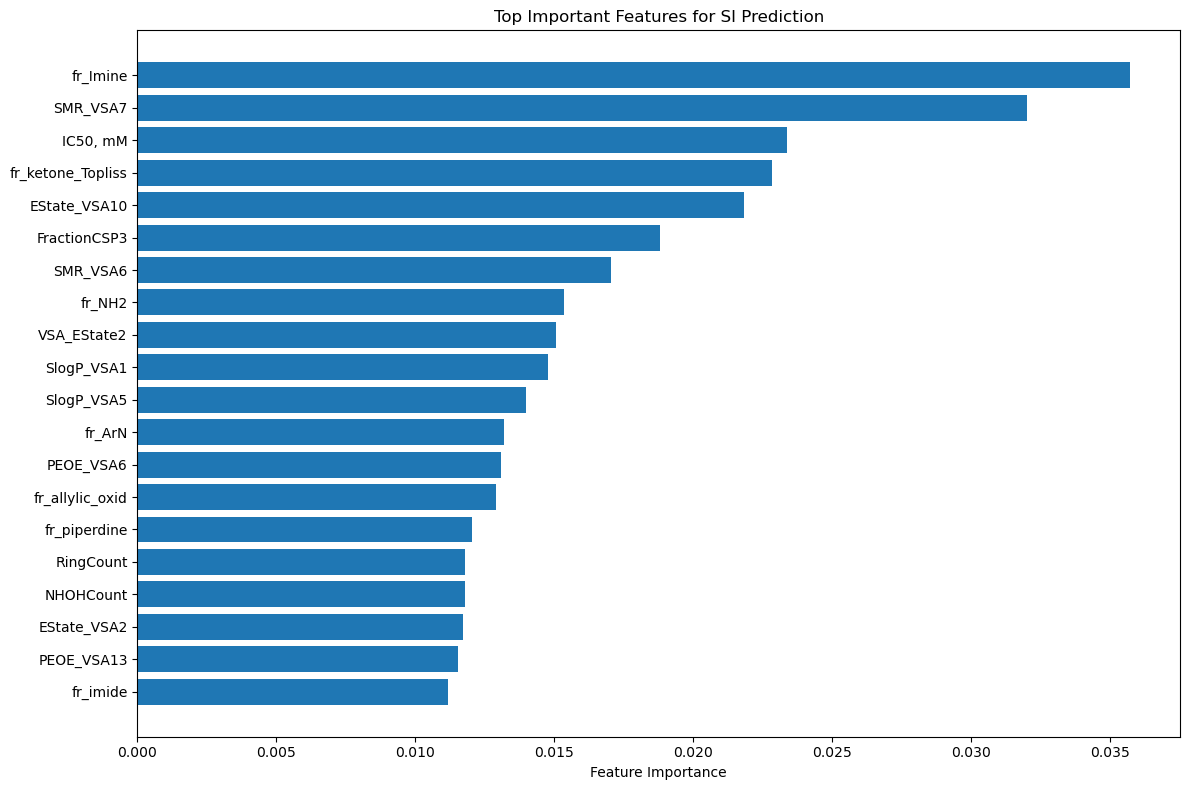

In [127]:
if hasattr(best_xgb_model, 'feature_importances_'):
    importances = best_xgb_model.feature_importances_
    feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
    
    sorted_idx = importances.argsort()[::-1]
    top_features = 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features for SI Prediction')
    plt.tight_layout()
    plt.savefig('ic50_feature_importance.png')
    plt.show()

### SVR

In [131]:
def optimize_svr(trial):
    params = {
        'C': trial.suggest_float('C', 0.1, 100, log=True),
        'epsilon': trial.suggest_float('epsilon', 0.001, 1, log=True),
        'kernel': trial.suggest_categorical('kernel', ['rbf']),
        'gamma': trial.suggest_float('gamma', 0.001, 10, log=True)
    }
    
    if params['kernel'] == 'poly':
        params['degree'] = trial.suggest_int('degree', 2, 5)
    
    model = SVR(**params)
    
    r2_scores = cross_val_score(
        model, X_train, y_train_ic50, 
        cv=CV_FOLDS_SVR, scoring='r2', n_jobs=-1
    )
    
    return np.mean(r2_scores)


In [132]:
study_svr = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=RANDOM_STATE)
)
study_svr.optimize(optimize_svr, n_trials=N_TRIALS_SVR)

[I 2025-06-04 01:58:12,515] A new study created in memory with name: no-name-7481509e-71b3-48a1-9e26-071b6d110726
[I 2025-06-04 01:58:14,679] Trial 0 finished with value: -0.20894228897201605 and parameters: {'C': 1.3292918943162164, 'epsilon': 0.7114476009343417, 'kernel': 'rbf', 'gamma': 0.847180141881998}. Best is trial 0 with value: -0.20894228897201605.
[I 2025-06-04 01:58:15,853] Trial 1 finished with value: 0.03640710820818118 and parameters: {'C': 6.251373574521747, 'epsilon': 0.0029380279387035343, 'kernel': 'rbf', 'gamma': 0.004207053950287938}. Best is trial 1 with value: 0.03640710820818118.
[I 2025-06-04 01:58:15,940] Trial 2 finished with value: -0.20907038140542866 and parameters: {'C': 0.14936568554617632, 'epsilon': 0.39676050770529864, 'kernel': 'rbf', 'gamma': 0.25378155082656645}. Best is trial 1 with value: 0.03640710820818118.
[I 2025-06-04 01:58:16,005] Trial 3 finished with value: -0.1962480397089014 and parameters: {'C': 13.311216080736884, 'epsilon': 0.0011527

In [134]:
print(f"Лучшие параметры для SVR:")
print(study_svr.best_params)
print(f"Лучший R2: {study_svr.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_svr)
fig.show()

fig = optuna.visualization.plot_param_importances(study_svr)
fig.show()

Лучшие параметры для SVR:
{'C': 99.0779522464687, 'epsilon': 0.1208514196513123, 'kernel': 'rbf', 'gamma': 0.01252967750721644}
Лучший R2: 0.1685


In [135]:
best_svr_model = SVR(
    **study_svr.best_params
)
best_svr_model.fit(X_train, y_train_ic50)

SVR(C=99.0779522464687, epsilon=0.1208514196513123, gamma=0.01252967750721644)

#### Оценка модели на лучшем наборе данных

In [136]:
y_pred_best_svr = best_svr_model.predict(X_test)

final_metrics_svr = {metric_name: metric_func(y_test_ic50, y_pred_best_svr) 
                 for metric_name, metric_func in metrics.items()}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_svr.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
R2: 0.2163
RMSE: 90.4937
MAE: 54.3287
MAPE: 1.5887


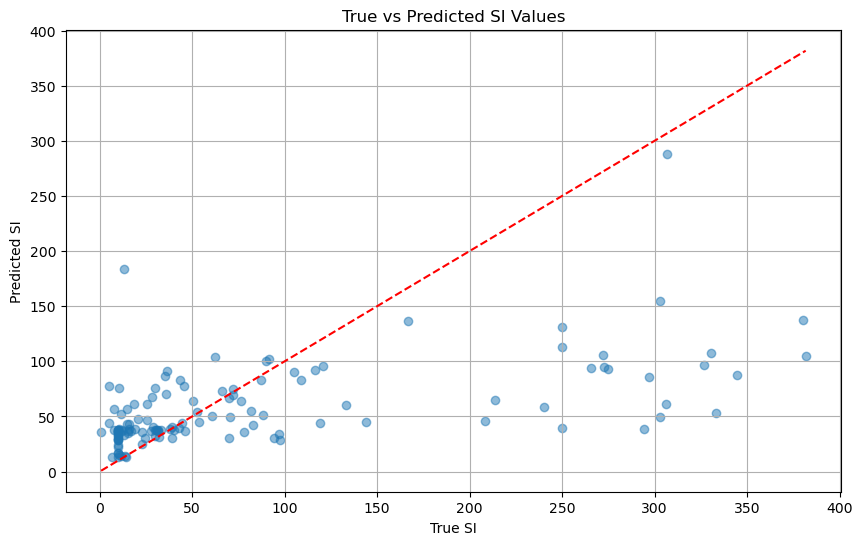

In [137]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ic50, y_pred_best_svr, alpha=0.5)
plt.plot([min(y_test_ic50), max(y_test_ic50)], 
         [min(y_test_ic50), max(y_test_ic50)], 'r--')
plt.xlabel('True SI')
plt.ylabel('Predicted SI')
plt.title('True vs Predicted SI Values')
plt.grid(True)
plt.show()

#### Анализ важности признаков

In [138]:
if hasattr(best_svr_model, 'feature_importances_'):
    importances = best_svr_model.feature_importances_
    feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
    
    sorted_idx = importances.argsort()[::-1]
    top_features = 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features for SI Prediction')
    plt.tight_layout()
    plt.show()

## Сравнение моделей

In [139]:
metrics_comparisson = {
    "RF": final_metrics_rf,
    "XGB": final_metrics_xgb,
    "SVR": final_metrics_svr
}

df_metrics = pd.DataFrame(metrics_comparisson)

In [140]:
df_metrics

,RF,XGB,SVR
R2,0.278785,0.370194,0.216336
RMSE,86.813123,81.125364,90.493658
MAE,58.214873,50.347651,54.328711
MAPE,2.504802,1.574592,1.588681


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Th

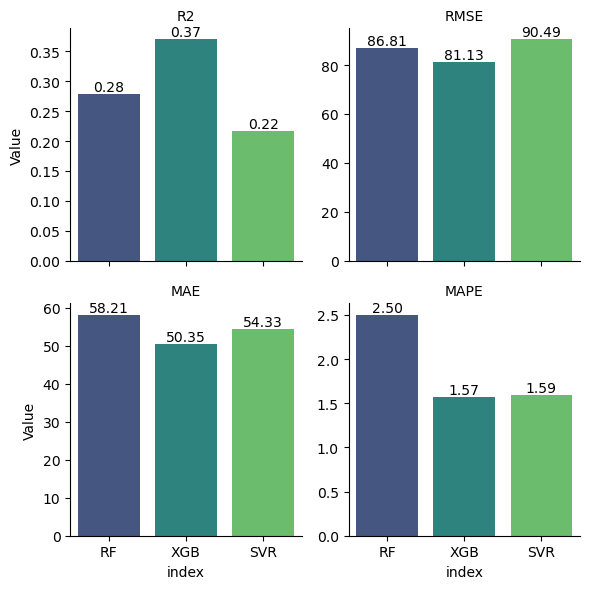

In [141]:
plot_data = df_metrics.T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

palette = sns.color_palette("viridis", n_colors=len(plot_data['index'].unique()))

g = sns.FacetGrid(plot_data, col="Metric", col_wrap=2, sharey=False)
g.map_dataframe(sns.barplot, x="index", y="Value", palette=palette, ci=None)
g.set_titles("{col_name}")

for ax in g.axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

g.tight_layout()
plt.show()

Очевидно, Random Forest является лучшей моделью